# Machine Learning

## Supervised ML Algorithms


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    LassoCV,
    RidgeCV,
    LogisticRegression,
)
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [15]:
cols = []
with open("/Users/jovanvelichkoski/PycharmProjects/IntroToDataScience/AuditoryExercises/Datasets/CaliforniaHousing/cal_housing.domain") as f:
    for line in f:
        name = line.split(":")[0].strip()
        cols.append(name)

In [16]:
california_housing_df = pd.read_csv("/Users/jovanvelichkoski/PycharmProjects/IntroToDataScience/AuditoryExercises/Datasets/CaliforniaHousing/cal_housing.data", header=None, names=cols)

In [17]:
california_housing_df.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [18]:
breast_cancer_dataset = load_breast_cancer()

In [19]:
print(breast_cancer_dataset["DESCR"])

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [20]:
breast_cancer_df = pd.DataFrame(
    breast_cancer_dataset["data"],
    columns=breast_cancer_dataset["feature_names"],
)

In [21]:
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
breast_cancer_df["Diagnosis"] = breast_cancer_dataset["target"]

In [23]:
breast_cancer_dataset["target_names"]

array(['malignant', 'benign'], dtype='<U9')

In [24]:
breast_cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Diagnosis                  0
dtype: int64

## Linear Algorithms
### Linear Regression
Linear Regression is used to predict the real value of a dependent variable (target), given the value of one or more independent variables (features).

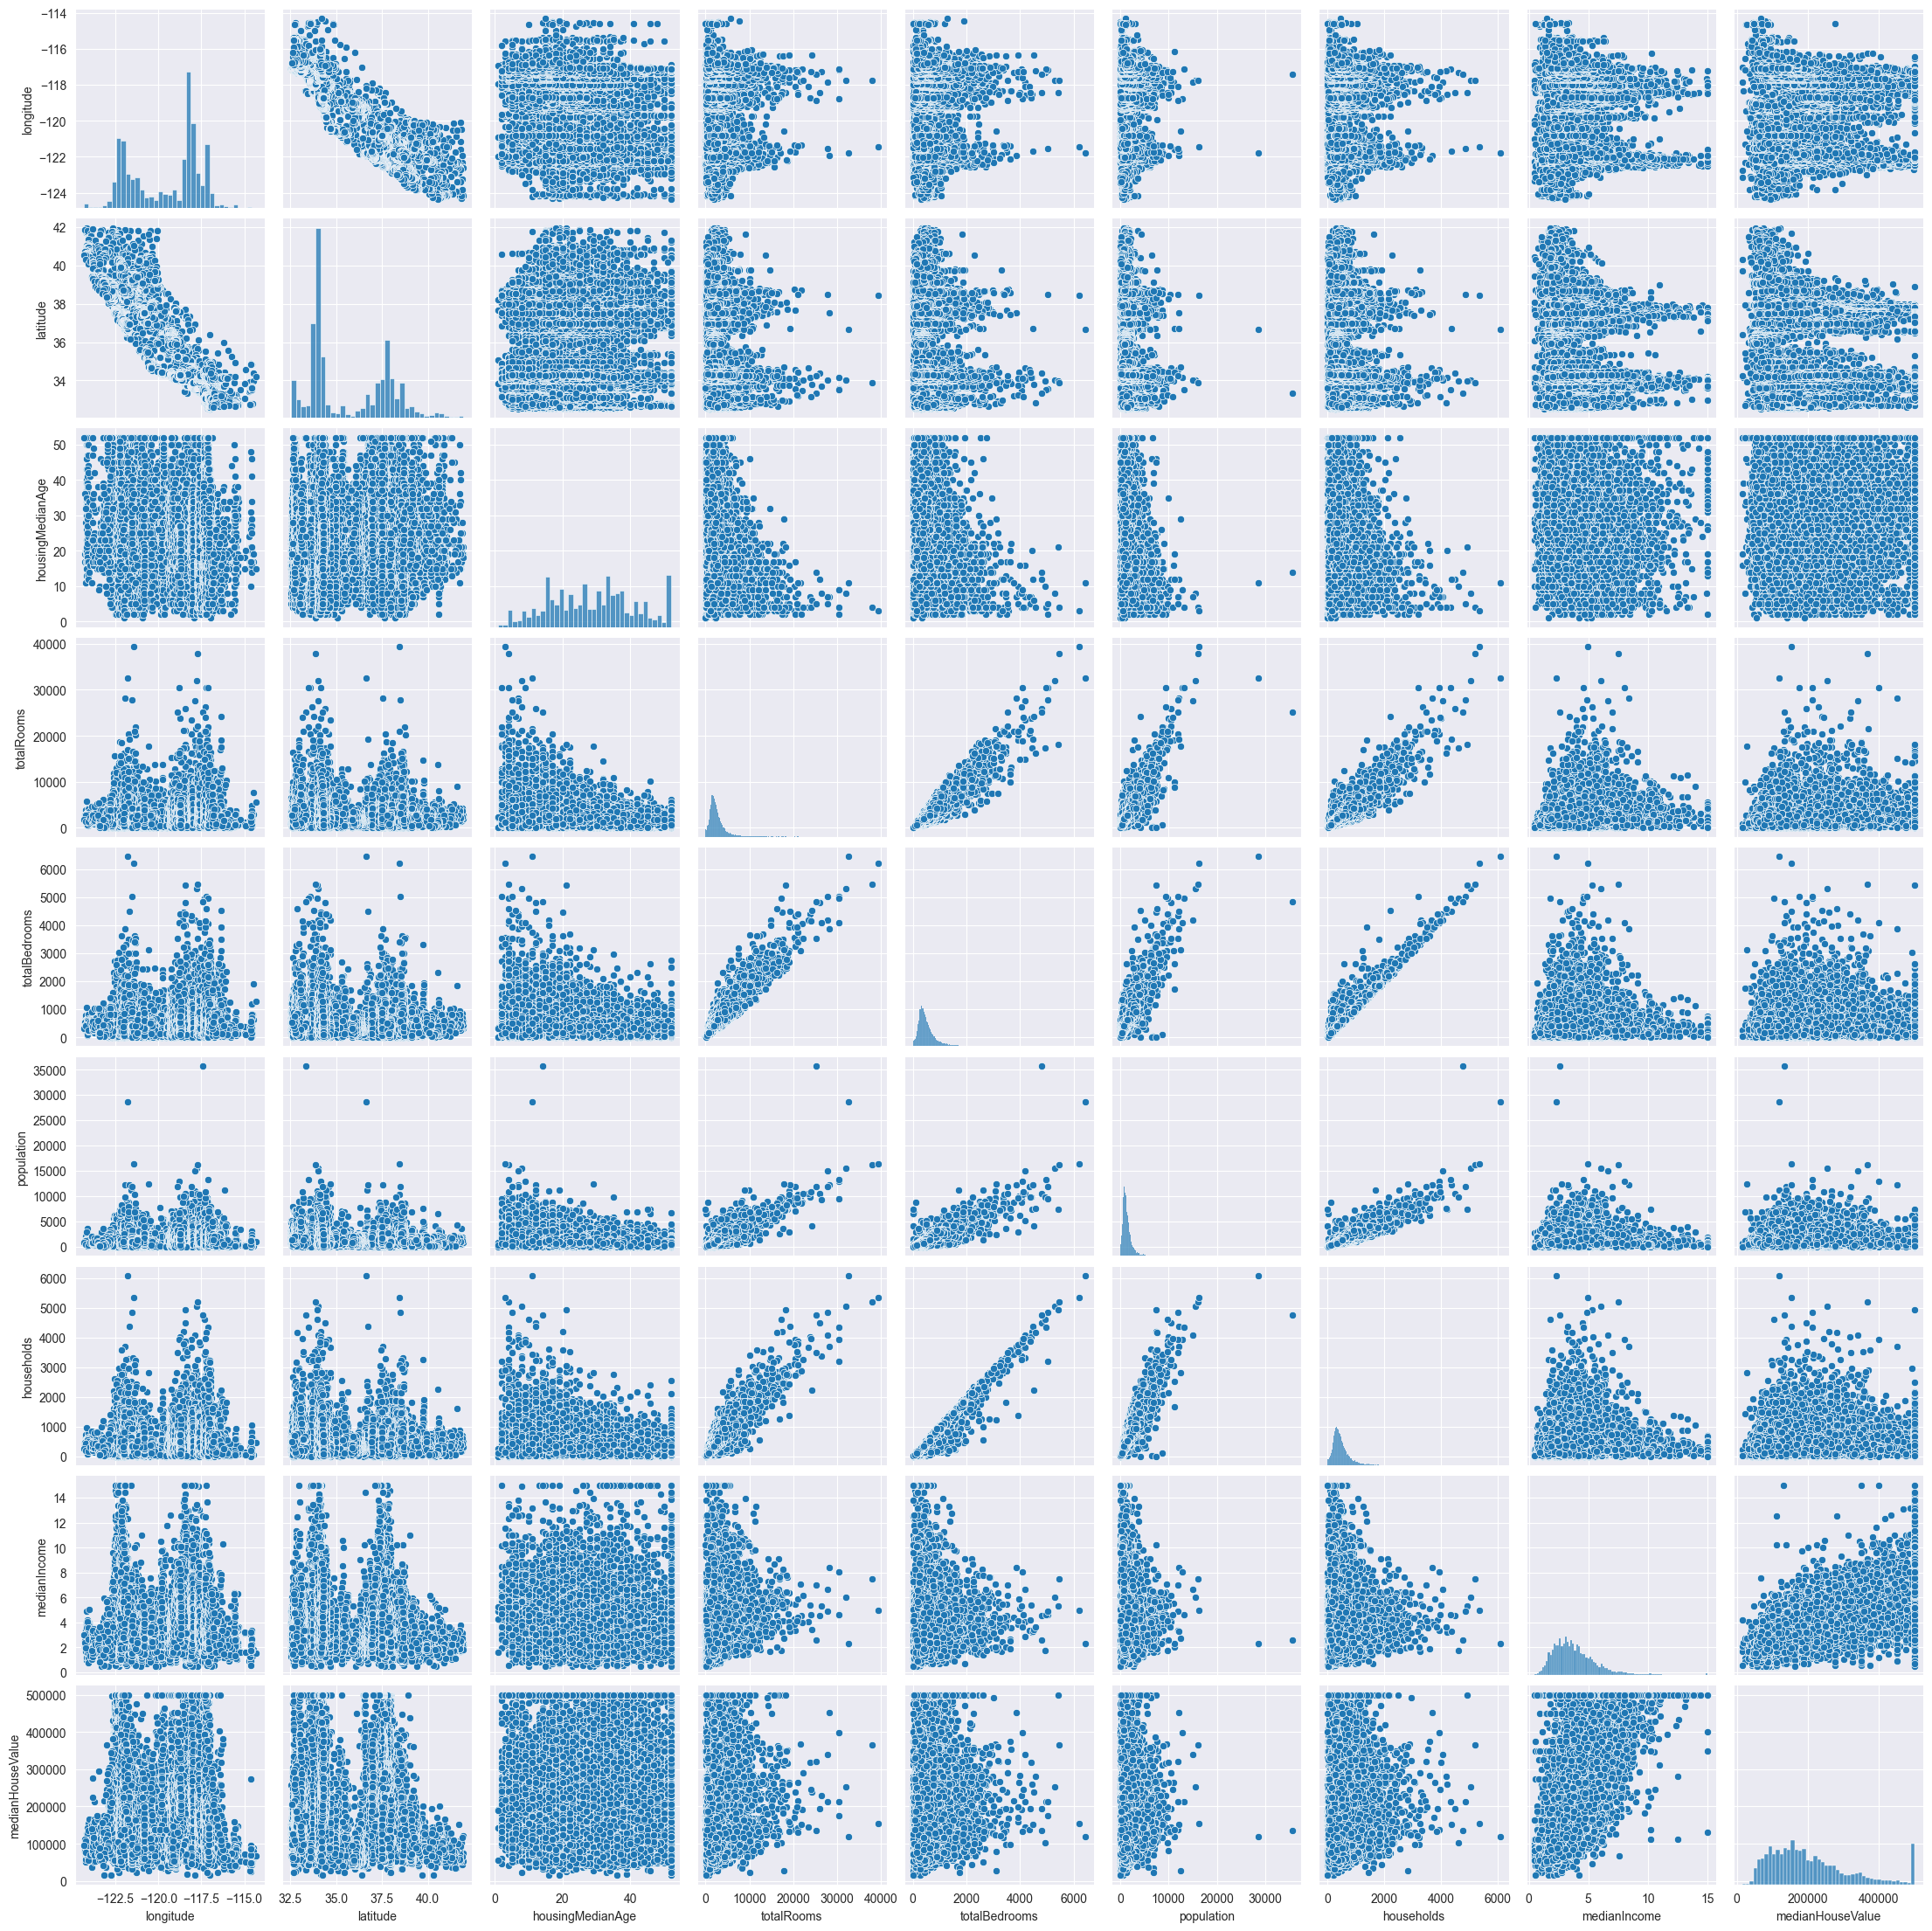

In [25]:
sns.pairplot(california_housing_df)

<Axes: >

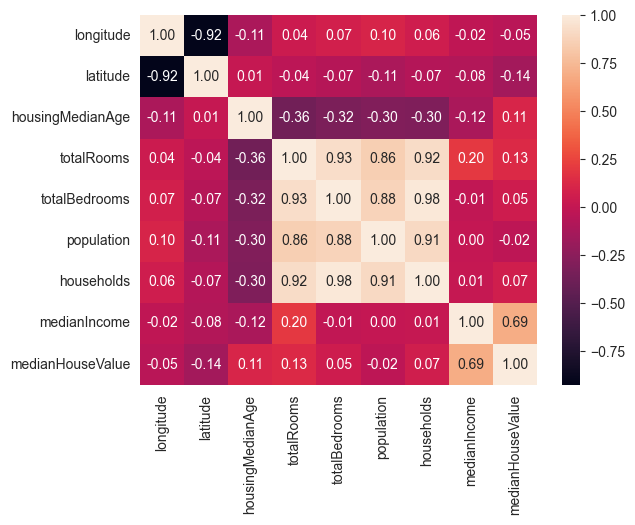

In [26]:
sns.heatmap(california_housing_df.corr(numeric_only=True), annot=True, fmt=".2f")

<Axes: >

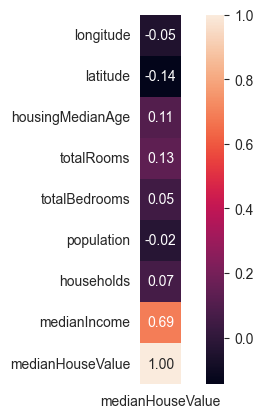

In [27]:
sns.heatmap(california_housing_df.corr()[["medianHouseValue"]], annot=True, fmt=".2f", square=True)

<Axes: xlabel='medianHouseValue', ylabel='Count'>

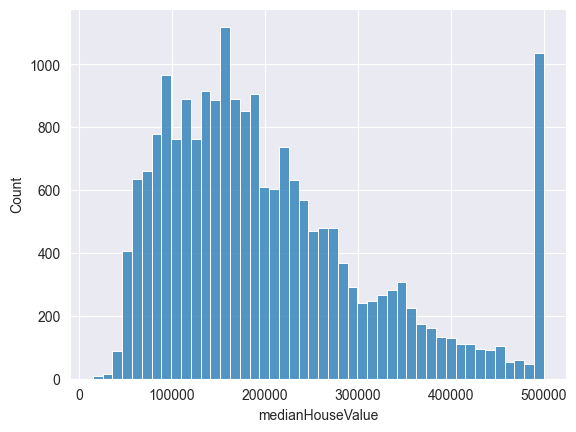

In [28]:
sns.histplot(california_housing_df["medianHouseValue"])

In [29]:
california_housing_df["medianHouseValue"] = california_housing_df["medianHouseValue"].apply(lambda x: x / 100000)

In [30]:
california_housing_df["medianHouseValue"].head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: medianHouseValue, dtype: float64

In [31]:
X, y = california_housing_df[["medianIncome"]], california_housing_df["medianHouseValue"]

In [32]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
train_X.head()

,medianIncome
14196,3.2596
8267,3.8125
17445,4.1563
14265,1.9425
2271,3.5542


In [34]:
train_y.head()

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
Name: medianHouseValue, dtype: float64

In [35]:
regressor = LinearRegression()

In [36]:
regressor.fit(train_X, train_y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
print(f"Coefficients: {regressor.coef_}")

Coefficients: [0.41933849]


In [38]:
print(f"Intercept: {regressor.intercept_}")

Intercept: 0.44459729169078677


In [39]:
pred_y = regressor.predict(test_X)

Mean absolute error

In [40]:
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")

MAE: 0.629908653009376


Mean absolute percentage error

In [41]:
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")

MAPE: 0.3905583956532853


Mean squared error

In [42]:
print(f"MSE: {mean_squared_error(test_y, pred_y)}")

MSE: 0.7091157771765548


R2 (squared) score

In [43]:
print(f"R2 Score: {r2_score(test_y, pred_y)}")

R2 Score: 0.45885918903846656


### Multiple Linear Regression

In [44]:
X,y = california_housing_df.drop(columns=["medianHouseValue"]), california_housing_df["medianHouseValue"]

In [45]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
regressor = LinearRegression()
regressor.fit(train_X, train_y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
print(f"Coefficients: {regressor.coef_}")
print(f"Intercept: {regressor.intercept_}")

Coefficients: [-4.26323917e-01 -4.24500719e-01  1.18280965e-02 -8.18797708e-05
  1.16260128e-03 -3.84922131e-04  4.63425720e-04  4.05384044e-01]
Intercept: -35.78224234818004


In [48]:
pred_y = regressor.predict(test_X)

In [49]:
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 0.5113671713316494
MAPE: 0.3061586142230371
MSE: 0.4918556441477768
RMSE: 0.7013242075871735
R2 Score: 0.6246548578993663


### Polynomial Regression

In [50]:
X,y = california_housing_df.drop(columns=["medianHouseValue"]), california_housing_df["medianHouseValue"]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
polynomial_features = PolynomialFeatures(degree=2)

In [52]:
train_X = polynomial_features.fit_transform(train_X)
test_X = polynomial_features.transform(test_X)

In [53]:
train_X

array([[ 1.00000000e+00, -1.17030000e+02,  3.27100000e+01, ...,
         3.88129000e+05,  2.03073080e+03,  1.06249922e+01],
       [ 1.00000000e+00, -1.18160000e+02,  3.37700000e+01, ...,
         5.71536000e+05,  2.88225000e+03,  1.45351562e+01],
       [ 1.00000000e+00, -1.20480000e+02,  3.46600000e+01, ...,
         1.12896000e+05,  1.39651680e+03,  1.72748297e+01],
       ...,
       [ 1.00000000e+00, -1.18380000e+02,  3.40300000e+01, ...,
         2.77729000e+05,  1.54642880e+03,  8.61070336e+00],
       [ 1.00000000e+00, -1.21960000e+02,  3.75800000e+01, ...,
         3.12481000e+05,  3.19703280e+03,  3.27092486e+01],
       [ 1.00000000e+00, -1.22420000e+02,  3.77700000e+01, ...,
         1.54256400e+06,  3.19877100e+03,  6.63320025e+00]],
      shape=(16512, 45))

In [54]:
test_X.shape

(4128, 45)

In [55]:
regressor = LinearRegression()

In [56]:
regressor.fit(train_X, train_y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [57]:
print(f"Coefficients: {regressor.coef_}")
print(f"Intercept: {regressor.intercept_}")

Coefficients: [-1.14621987e-08  6.27640164e+00  9.16096619e+00 -7.61523761e-01
  9.93827428e-03 -4.85665675e-02  6.84071343e-03 -2.08059169e-02
 -9.52794657e+00  4.26313562e-02  1.14622993e-01 -9.26963934e-03
  1.28469847e-04 -6.56505048e-04  9.83326406e-05 -2.62895083e-04
 -1.22848903e-01  6.65048678e-02 -1.00609647e-02  1.35005940e-04
 -7.49859895e-04  1.38616836e-04 -3.17629240e-04 -1.28469844e-01
  2.17269244e-04 -1.40432911e-06  2.68495970e-05 -1.31707016e-05
  2.75070977e-05  1.15474558e-03 -2.55785600e-08  2.71285656e-07
 -5.18201822e-08  2.10919814e-07  9.85940516e-05 -1.05782368e-06
  5.29491193e-07 -1.36542668e-06 -2.99841606e-04  3.02370145e-08
 -4.67336166e-07 -4.42724889e-05  9.89302880e-07 -1.83805240e-05
 -2.51282859e-02]
Intercept: 218.52886633147165


In [58]:
pred_y = regressor.predict(test_X)

In [59]:
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 0.4535554741263756
MAPE: 0.2608540093901392
MSE: 0.4093210914726072
RMSE: 0.6397820656071934
R2 Score: 0.6876386698585641


With validation

In [60]:
X,y = california_housing_df.drop(columns=["medianHouseValue"]), california_housing_df["medianHouseValue"]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
val_X, test_X, val_y, test_y = train_test_split(test_X, test_y, test_size=0.5, random_state=42)

In [62]:
scores = []
for i in range(1, 5 + 1):
    poly = PolynomialFeatures(degree=i)
    model = LinearRegression()
    poly_train_X = poly.fit_transform(train_X)
    poly_val_X = poly.transform(val_X)
    model.fit(poly_train_X, train_y)
    pred_y = model.predict(poly_val_X)
    scores.append(mean_absolute_percentage_error(val_y, pred_y))

In [63]:
scores

[0.31305176348221075,
 0.26506717009447267,
 0.2618827085755977,
 0.2701454251729748,
 0.448666100251663]

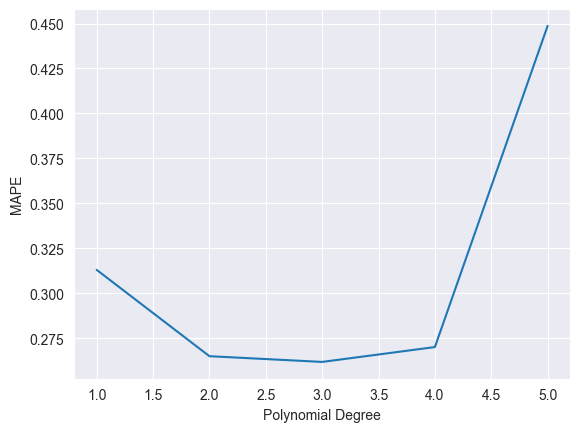

In [64]:
plt.plot(range(1, 5 + 1), scores)
plt.xlabel("Polynomial Degree")
plt.ylabel("MAPE")
plt.show()

In [65]:
polynomial_feaures = PolynomialFeatures(degree=3)

In [66]:
train_X = polynomial_feaures.fit_transform(train_X)
test_X = polynomial_feaures.transform(test_X)

In [67]:
regressor = LinearRegression()

In [68]:
regressor.fit(train_X, train_y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [69]:
pred_y = regressor.predict(test_X)

In [70]:
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 0.440124863112825
MAPE: 0.2733201083669041
MSE: 0.48422458890768577
RMSE: 0.6958624784450487
R2 Score: 0.6284820245290834


## Lasso Regression (L1)

In [71]:
X,y = california_housing_df.drop(columns=["medianHouseValue"]), california_housing_df["medianHouseValue"]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
regressor = Lasso(alpha=1.0).fit(train_X, train_y)

In [73]:
print(f"Coefficients: {regressor.coef_}")
print(f"Intercept: {regressor.intercept_}")

Coefficients: [ 0.         -0.          0.00925796  0.00035146 -0.0021371  -0.00058563
  0.00231876  0.06265957]
Intercept: 1.462220434818439


In [74]:
train_X.columns[regressor.coef_ != 0]

Index(['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population',
       'households', 'medianIncome'],
      dtype='object')

In [75]:
pred_y = regressor.predict(test_X)

In [76]:
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 0.7789094316204757
MAPE: 0.5376911136506334
MSE: 0.9875491641122468
RMSE: 0.9937550825592022
R2 Score: 0.2463809539538272


LassoCV - picks the best Alpha automatically

In [77]:
regressor = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], cv=5).fit(train_X, train_y)

In [78]:
print(f"Alpha: {regressor.alpha_}")

Alpha: 0.001


In [79]:
print(f"Coefficients: {regressor.coef_}")
print(f"Intercept: {regressor.intercept_}")

Coefficients: [-4.22613024e-01 -4.21033735e-01  1.18800296e-02 -8.21939245e-05
  1.15708842e-03 -3.85081132e-04  4.72235506e-04  4.05552476e-01]
Intercept: -35.464578116132074


In [80]:
pred_y = regressor.predict(test_X)

In [81]:
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 0.5113346012069308
MAPE: 0.30609249437353914
MSE: 0.4918609159000938
RMSE: 0.7013279660045604
R2 Score: 0.62465083491692


### Ridge Regression (L2)

In [82]:
X,y = california_housing_df.drop(columns=["medianHouseValue"]), california_housing_df["medianHouseValue"]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
regressor = Ridge(alpha=1.0).fit(train_X, train_y)

In [84]:
pred_y = regressor.predict(test_X)

In [85]:
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 0.5113663495172149
MAPE: 0.3061569665024433
MSE: 0.4918557129791451
RMSE: 0.7013242566596033
R2 Score: 0.6246548053727357


RidgeCV

In [86]:
regressor = RidgeCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], cv=5).fit(train_X, train_y)

In [87]:
print(f"Alpha: {regressor.alpha_}")

Alpha: 10.0


In [88]:
print(f"Coefficients: {regressor.coef_}")
print(f"Intercept: {regressor.intercept_}")

Coefficients: [-4.25356271e-01 -4.23596665e-01  1.18435199e-02 -8.19693583e-05
  1.16124492e-03 -3.84961512e-04  4.65690255e-04  4.05435655e-01]
Intercept: -35.69950280373701


In [89]:
pred_y = regressor.predict(test_X)

In [90]:
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 0.5113589859675612
MAPE: 0.30614220207488846
MSE: 0.4918567284465968
RMSE: 0.7013249806235314
R2 Score: 0.6246540304486711
